In [22]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [16]:
c_t=np.loadtxt('c_sum_trips_frac_t_here75.txt')
c_t_ff=np.loadtxt('c_sum_trips_frac_t.txt')

c_r=np.loadtxt('c_sum_trips_frac_r_here75.txt')
c_r_ff=np.loadtxt('c_sum_trips_frac_r.txt')

c_it=np.loadtxt('c_sum_trips_frac_it_here75.txt')
c_it_ff=np.loadtxt('c_sum_trips_frac_it.txt')


(1, 500)

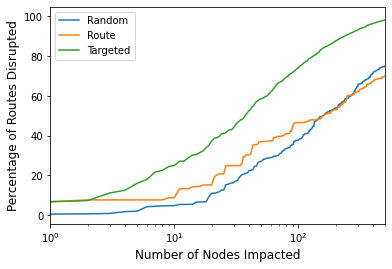

In [3]:
fig=plt.figure()
plt.semilogx(np.linspace(0,len(c_r)-1,len(c_r))+1,c_r*100,label='Random')
plt.plot(np.linspace(0,len(c_t)-1,len(c_t))+1,c_t*100,label='Route')
plt.plot(np.linspace(0,len(c_it)-1,len(c_it))+1,c_it*100,label='Targeted')
plt.legend(prop={'size': 10})
plt.ylabel('Percentage of Routes Disrupted',fontsize=12)
plt.xlabel('Number of Nodes Impacted',fontsize=12)
plt.xlim(1,500)


(1, 500)

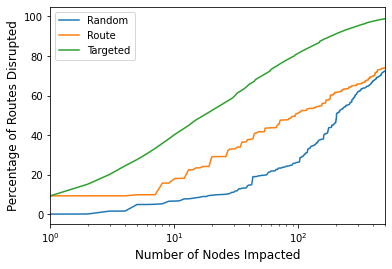

In [4]:
fig=plt.figure()
plt.semilogx(np.linspace(0,len(c_r_ff)-1,len(c_r_ff))+1,c_r_ff*100,label='Random')
plt.plot(np.linspace(0,len(c_t_ff)-1,len(c_t_ff))+1,c_t_ff*100,label='Route')
plt.plot(np.linspace(0,len(c_it_ff)-1,len(c_it_ff))+1,c_it_ff*100,label='Targeted')
plt.legend(prop={'size': 10})
plt.ylabel('Percentage of Routes Disrupted',fontsize=12)
plt.xlabel('Number of Nodes Impacted',fontsize=12)
plt.xlim(1,500)


In [24]:
b = pd.read_csv('../df_speeds75.csv')


In [27]:
b.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'speeds', 'speeds_f',
       'speeds_rat', 'speeds_rat_q'],
      dtype='object')

In [29]:
wbr=np.where(b['speeds_rat']<=0.25)
wr=np.where((b['speeds_rat']<=0.5) & (b['speeds_rat']>0.25))
wy=np.where((b['speeds_rat']<=0.75) & (b['speeds_rat']>0.5))
wg=np.where(b['speeds_rat']>0.75)


In [35]:
b.longitude.values[wg]

array([-77.01615, -77.01615, -77.01611, ..., -77.0813 , -77.08092,
       -77.0808 ])

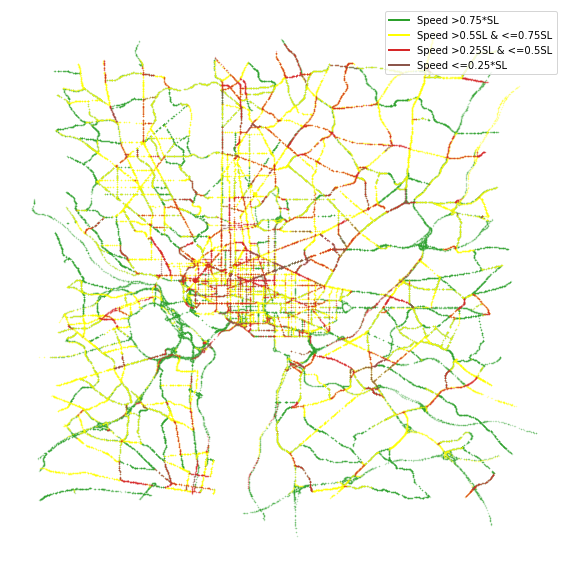

In [53]:
from matplotlib.lines import Line2D
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(b.longitude.values[wg], b.latitude.values[wg],'o',color='tab:green',markersize=0.5,alpha=0.3)
ax.plot(b.longitude.values[wy], b.latitude.values[wy],'o',color='yellow',markersize=0.5,alpha=0.3)
ax.plot(b.longitude.values[wr], b.latitude.values[wr],'o',color='tab:red',markersize=0.5,alpha=0.3)
ax.plot(b.longitude.values[wbr], b.latitude.values[wbr],'o',color='tab:brown',markersize=0.5,alpha=0.3)
ax.axis('off')

legend_elements = [Line2D([0], [0], color='tab:green', lw=2, label='Speed >0.75*SL'),
                   Line2D([0], [0], color='yellow', lw=2, label='Speed >0.5SL & <=0.75SL'),
                   Line2D([0], [0], color='tab:red', lw=2, label='Speed >0.25SL & <=0.5SL'),
                   Line2D([0], [0], color='tab:brown', lw=2, label='Speed <=0.25*SL')]
ax.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.savefig('here_75_speeds.png',dpi=600)